Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

* Classification to predict the region
* Regression to predict the price of avocado

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso

In [2]:
Avocadodata=pd.read_csv('avocado.csv')

In [3]:
df=pd.DataFrame(Avocadodata)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The data consists of 18248 instances and 14 columns, It also has an unnamed column with indexes which can be dropped

In [4]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True)

In [5]:
df.shape

(18249, 13)

Data has 13 columns and 18249 rows now

# Exploratory Data Analysis:

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

From the above results we can observe that the columns Date, type and region are object data type, year is integer and rest of thge columns are float data

# Visualization:

In [8]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

The column 'type' has categorical data which has 9126 entries of conentional and 9123 entries of organic

<AxesSubplot:xlabel='type', ylabel='Count'>

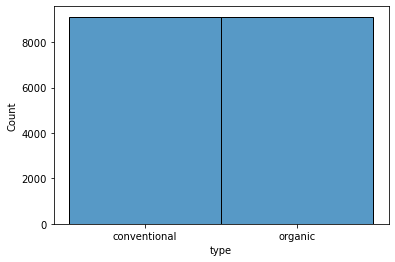

In [9]:
sns.histplot(df['type'])

In [10]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Region column has several region names which is again a categorical data and the data is equally distributed

<AxesSubplot:xlabel='region', ylabel='Count'>

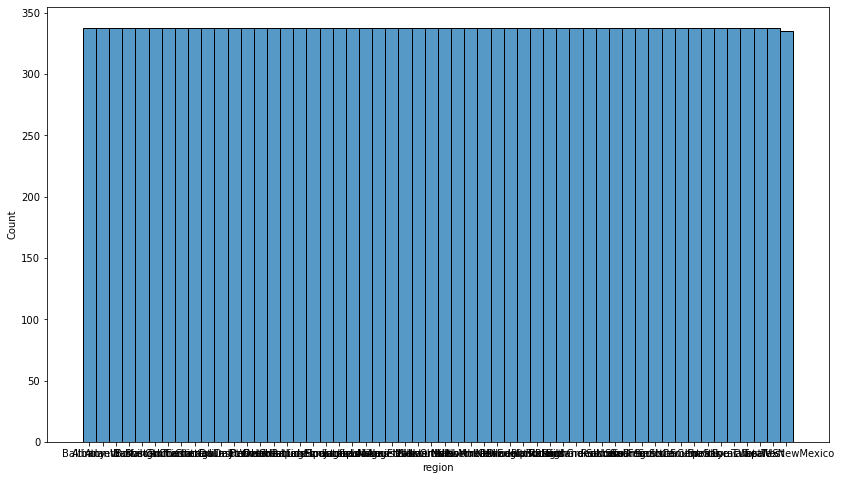

In [11]:
plt.figure(figsize = (14,8))
sns.histplot(df['region'])

In [12]:
#We can now check for the characteristics of year column

df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

The dataset consists of data of 4 years which is again categorical data

<AxesSubplot:xlabel='year', ylabel='Density'>

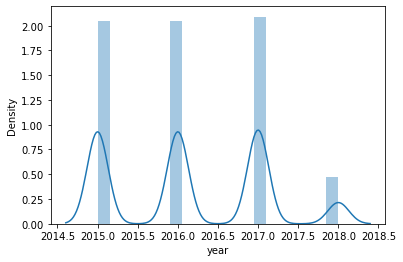

In [13]:
sns.distplot(df['year'])

Graph tells that the year 2015, 2016, 2017 records are equal in number and 2018 records are lesser in number

In [14]:
#Checking for characteristics of Date column
df['Date'].value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

The data has 169 unique dates which can be considered to categorical data and later we can check for it relationship with region and price

(array([  64.,  267.,  860., 1772., 2409., 2415., 2191., 2315., 1931.,
        1481., 1051.,  621.,  352.,  246.,   92.,   85.,   47.,   39.,
           8.,    3.]),
 array([0.44  , 0.5805, 0.721 , 0.8615, 1.002 , 1.1425, 1.283 , 1.4235,
        1.564 , 1.7045, 1.845 , 1.9855, 2.126 , 2.2665, 2.407 , 2.5475,
        2.688 , 2.8285, 2.969 , 3.1095, 3.25  ]),
 <BarContainer object of 20 artists>)

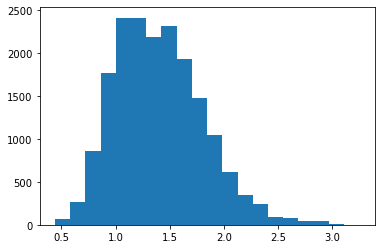

In [15]:
#We can now check for distribution of data in each column
plt.hist(df['AveragePrice'],bins=20)

We can observe that maximum price of avocado ranges from 1 to 1.5 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

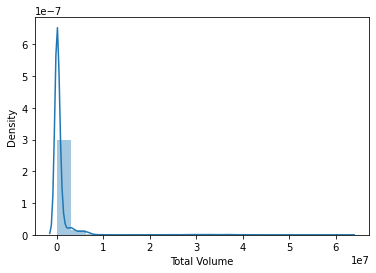

In [16]:
sns.distplot(df['Total Volume'],bins=20)

<AxesSubplot:xlabel='4046', ylabel='Density'>

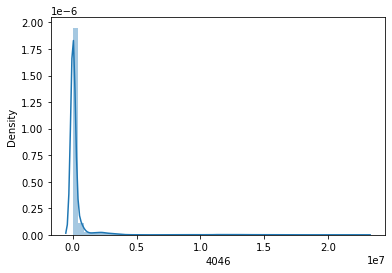

In [17]:
sns.distplot(df['4046'])

We can check for each different variables relation with the output variable

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

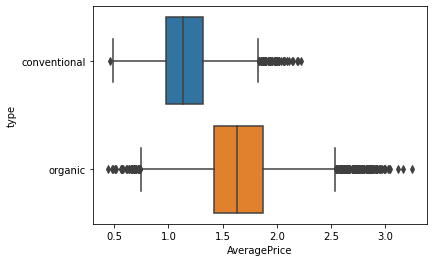

In [18]:
sns.boxplot(y="type", x="AveragePrice",data=df)

From the above plot we can observe that the price is more for organic avocado and less for conventional avocado

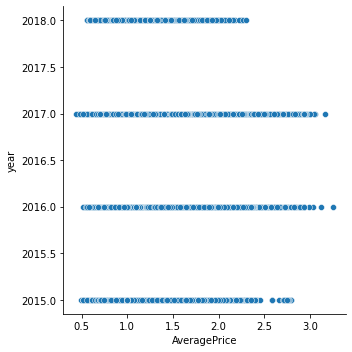

In [19]:
sns.relplot(y="year", x="AveragePrice",data=df)

We can observe that the AveragePrice reaches highest value in the year 2017 and 2016 than in 2015 and 2018

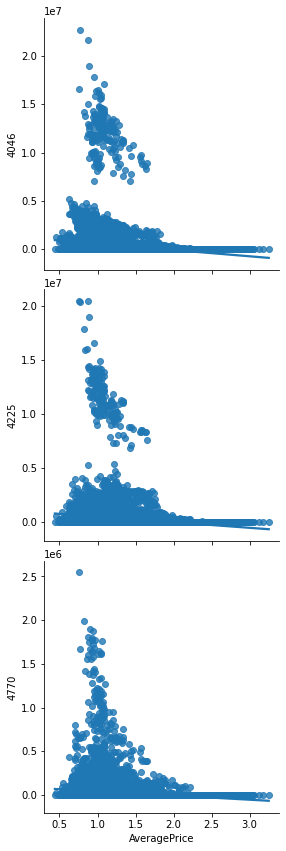

In [20]:
sns.pairplot(df, y_vars=['4046','4225','4770'], x_vars='AveragePrice', height=4, aspect=1, kind='reg')
plt.show()

In this dataset the columns the numbers 4046, 4225 and 4770 tells the size of avocado as small, medium and large respectively and all the 3 columns has similar relation with AveragePrice 

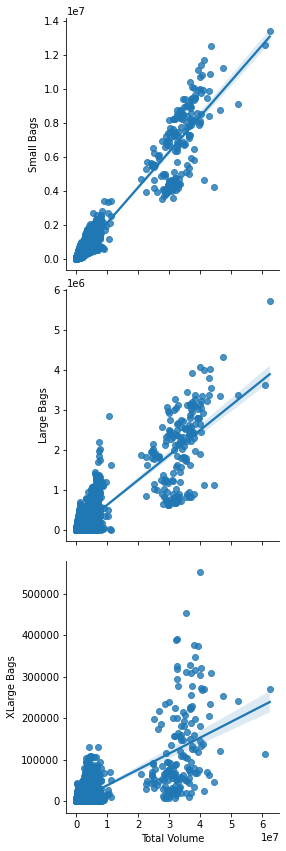

In [21]:
sns.pairplot(df, y_vars=['Small Bags','Large Bags','XLarge Bags'], x_vars='Total Volume',kind='reg',height=4,aspect=1)
plt.show()

We can observe that the Small bag column has a good relation with Total volume column from the above graphs

In [22]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

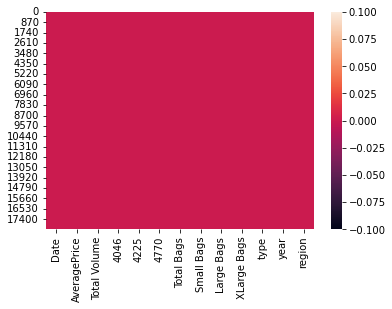

In [23]:
sns.heatmap(df.isnull())

We can observe that there is no missing values in the dataset

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
cat_df=['Date','type','region']
for columns in cat_df:
    df[columns] = le.fit_transform(df[columns])

In [26]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17283,105,1.16,4113.70,14.26,914.68,0.00,3184.76,168.63,3016.13,0.00,1,2017,47
7948,156,0.99,460716.58,210307.64,80809.78,3034.55,166564.61,124648.00,41191.56,725.05,0,2017,44
12414,90,1.35,16032.03,468.89,7138.63,0.00,8424.51,781.74,7642.77,0.00,1,2016,9
10231,38,1.85,5756.80,1243.87,4399.58,0.00,113.35,103.33,10.02,0.00,1,2015,21
12895,77,1.32,14968.56,9384.38,39.92,0.00,5544.26,4949.96,594.30,0.00,1,2016,18


In [27]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


Key observations:
* Mean > median in Total Volume, 4046, 4225, 4770, Total bags, small bags, Large bags, Xlarge bags, hence skewness present in these column
* Outliers are present in all the columns except type, region, year and date, as there is high difference between 75th percentile and max
* We can see that there is a high gap between mean and std, hence the data is highly spreaded

In [28]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


<AxesSubplot:>

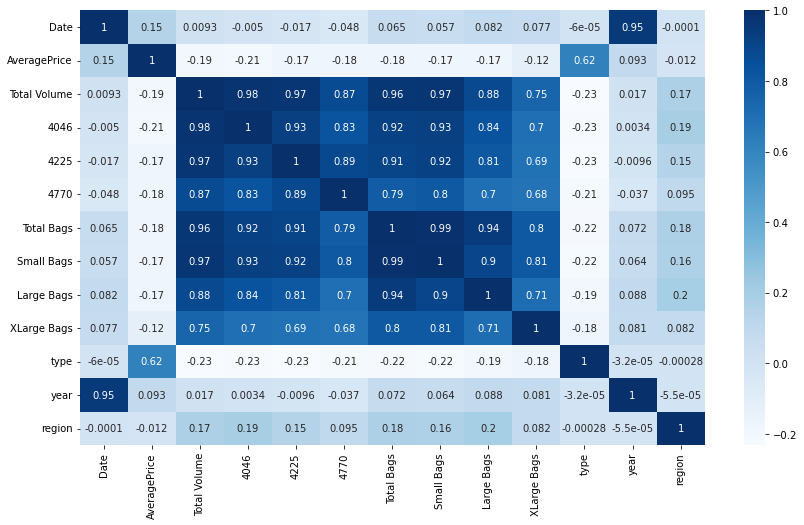

In [29]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Observations:
* AveragePrice is high correlation only with type and has negative correlation with other columns
* Total bags has a good correlation with small bags and total volume
* Total volume and 4046 are highly correlated

Date               AxesSubplot(0.125,0.657941;0.133621x0.222059)
AveragePrice    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Total Volume     AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4046            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
4770               AxesSubplot(0.125,0.391471;0.133621x0.222059)
Total Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Small Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Large Bags      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.766379,0.391471;0.133621x0.222059)
type                  AxesSubplot(0.125,0.125;0.133621x0.222059)
year               AxesSubplot(0.285345,0.125;0.133621x0.222059)
region              AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

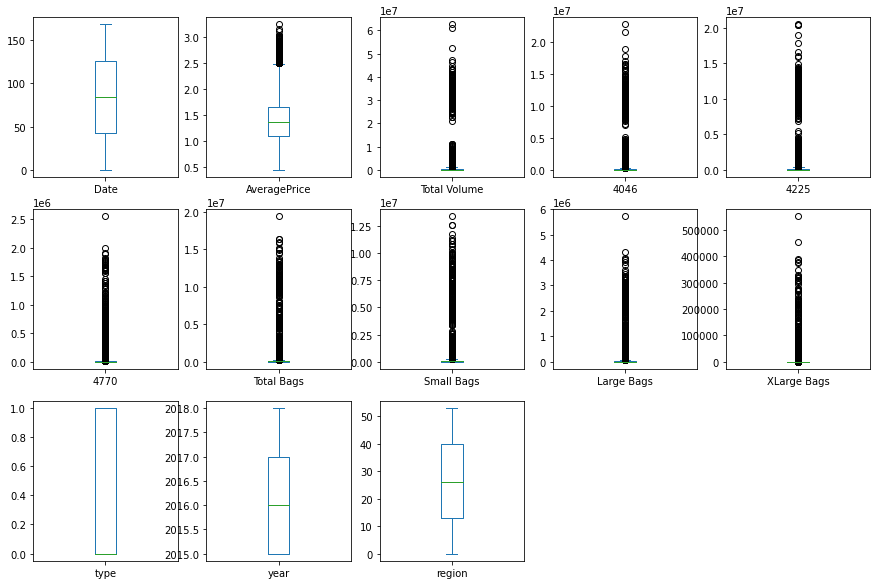

In [30]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(15,10))

In [31]:
# To remove the outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1144,51,0.80,2326942.14,976982.58,455203.42,86202.11,808554.03,722787.61,74359.03,11407.39,0,2015,22
6330,131,0.99,502774.82,119584.90,56064.04,43719.76,283406.12,232206.09,28983.01,22217.02,0,2017,13
14835,115,1.23,11754.42,1756.42,4656.72,0.00,5341.28,125.41,5215.87,0.00,1,2017,1
3373,58,0.91,173980.10,82198.65,38935.77,17174.63,35671.05,27386.88,7182.14,1102.03,0,2016,10
16159,116,0.77,9755.34,422.08,1987.08,0.00,7346.18,218.01,7128.17,0.00,1,2017,26


In [32]:
df_new.shape

(17651, 13)

* There are 17651 rows and 13 columns in new dataset after removing outliers.

In [33]:
df.shape

(18249, 13)

* There are 18249 rows and 13 columns in old dataset

In [34]:
# Now we can check for data loss

Dataloss = (((18249-17651)/18249)*100)
Dataloss

3.276891884486821

We can observe that dataloss in zscore method after removing outliers of 3.27% which is less than 10%

In [35]:
df_new.skew()

Date            0.013714
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [36]:
# we can observe that there is skewness present in the data in case of Total volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [37]:
df_new[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']] = scaler.fit_transform(df_new[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].values)

In [38]:
df_new.skew()

Date            0.013714
AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

Hence the skewness is removed from the data

# Avocado AveragePrice Prediction using regressors

We can now check for multicolinearity

In [39]:
# Data to Predict AveragePrice
x=df_new.drop(['AveragePrice'],axis=1)
x.sample()

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10289,32,-0.297239,0.155773,-0.1986,-1.228986,-0.428559,-0.243363,-1.624482,-0.677919,1,2015,22


In [40]:
y=df_new['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [41]:
y.shape,x.shape

((17651,), (17651, 12))

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [44]:
vif_calc()

    VIF Factor      Features
0     5.302630          Date
1    53.822355  Total Volume
2     7.255067          4046
3    11.382928          4225
4     3.951874          4770
5    35.132947    Total Bags
6    16.627979    Small Bags
7     3.459544    Large Bags
8     2.055201   XLarge Bags
9     7.526606          type
10   10.919979          year
11    4.211503        region


We can observe that Total Volume and Total Bags is creating multicolinearity with the values 53.822 and 35.13, from the df.corr() heat map we can observe that Total Volume has -0.19 correlation and Total Bags has -0.18 correlation with AveragePrice hence Total Volume column can be dropped as its contribution is lesser to Averageprice than the contribution of Total Bags 

In [45]:
x = x.drop(["Total Volume"],axis=1)
x.shape

(17651, 11)

In [46]:
vif_calc()

    VIF Factor     Features
0     5.290095         Date
1     3.750453         4046
2     4.327340         4225
3     3.938025         4770
4    24.564969   Total Bags
5    16.627010   Small Bags
6     3.415951   Large Bags
7     2.041152  XLarge Bags
8     7.085990         type
9    10.401296         year
10    4.181267       region


We can observe that Total Bags and Small Bags is creating multicolinearity with the values 24.56 and 16.62, Total bags can be dropped as its contribution to Average price is -0.18 and Small bags contribution is -0.17

In [47]:
x = x.drop(["Total Bags"],axis=1)
x.shape

(17651, 10)

In [48]:
vif_calc()

   VIF Factor     Features
0    5.193000         Date
1    3.729542         4046
2    4.171083         4225
3    3.937674         4770
4    4.126143   Small Bags
5    1.869287   Large Bags
6    2.040549  XLarge Bags
7    7.078599         type
8   10.354675         year
9    4.181173       region


We can again observe that Date and Year columns are creating multicolinearity as the Price isn't much dependent on Date we can drop off the Date column

In [49]:
x = x.drop(["Date"],axis=1)
x.shape

(17651, 9)

In [50]:
vif_calc()

   VIF Factor     Features
0    3.602368         4046
1    4.078068         4225
2    3.768649         4770
3    3.573757   Small Bags
4    1.756585   Large Bags
5    1.956838  XLarge Bags
6    7.062955         type
7    6.895346         year
8    4.180731       region


Hence the multicolinearity is removed from the data

In [51]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13238, 9), (4413, 9), (13238,), (4413,))

In [53]:
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()
La=Lasso()
rd=Ridge()

In [54]:
model=[lm,DTR,KNR,svr,La,rd]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Score of ",m,"is :",m.score(x_train,y_train))
    print("r2 score :",r2_score(y_test,pred))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Mean squared error :",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')

Score of  LinearRegression() is : 0.47690642614002576
r2 score : 0.4690412634055062
Errors of  LinearRegression() is
Mean absolute error : 0.22108398048992686
Mean squared error : 0.0797396357895357
Root mean squared error : 0.28238207412924726


Score of  DecisionTreeRegressor() is : 1.0
r2 score : 0.6872103909929783
Errors of  DecisionTreeRegressor() is
Mean absolute error : 0.14308180376161342
Mean squared error : 0.046974892363471556
Root mean squared error : 0.21673691970559966


Score of  KNeighborsRegressor() is : 0.8941862860604416
r2 score : 0.8290833823087831
Errors of  KNeighborsRegressor() is
Mean absolute error : 0.11414865171085428
Mean squared error : 0.025668338998413774
Root mean squared error : 0.1602134170361951


Score of  SVR() is : 0.0397605353460464
r2 score : 0.040570823280558166
Errors of  SVR() is
Mean absolute error : 0.3067318105035412
Mean squared error : 0.14408753043250286
Root mean squared error : 0.37958863317083513


Score of  Lasso() is : 0.0
r2 score

From the above scores and r2 scoes we can see that KNeighborsRegressor() model is working best with the score and r2 score of 89% and 82%

In [55]:
#WE can now try with Cross validation for the models 
from sklearn.model_selection import cross_val_score
model=[lm,DTR,KNR,svr,La,rd]
for i in model:
    score=cross_val_score(i,x_train,y_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())
    print('\n')

score of  LinearRegression() is : [0.46791549 0.48883096 0.48305827 0.48172207 0.45595803]
score mean of  LinearRegression() is : 0.4754969629827553
score std of  LinearRegression() is : 0.0119412689422381


score of  DecisionTreeRegressor() is : [0.62529511 0.66443886 0.64850101 0.61796087 0.65365952]
score mean of  DecisionTreeRegressor() is : 0.6419710721701067
score std of  DecisionTreeRegressor() is : 0.017542169808562016


score of  KNeighborsRegressor() is : [0.80221541 0.80943405 0.8160839  0.80571355 0.80966958]
score mean of  KNeighborsRegressor() is : 0.8086232983021532
score std of  KNeighborsRegressor() is : 0.004624724126182312


score of  SVR() is : [0.03797071 0.03006623 0.02666509 0.03524437 0.02290674]
score mean of  SVR() is : 0.03057062615416417
score std of  SVR() is : 0.00549268501441593


score of  Lasso() is : [-2.84083276e-03 -5.81442343e-05 -8.46671906e-04 -7.70887232e-04
 -1.80639033e-03]
score mean of  Lasso() is : -0.001264585292286835
score std of  Lasso()

Even with CV we can see that KNeighborsRegressor() model is performing well with mean score of 80%

In [56]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV
KNR=KNeighborsRegressor()
params={'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
grd=GridSearchCV(estimator=KNR,param_grid=params,cv=5)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [57]:
grd.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [58]:
grd.best_score_

0.8263726620699234

In [59]:
# Saving the best model
Final_regressor=KNeighborsRegressor(algorithm='auto',weights='distance')
Final_regressor.fit(x_train,y_train)
pred=Final_regressor.predict(x_test)
print("Score: ",Final_regressor.score(x_train,y_train)*100)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))

Score:  100.0
R2_Score: 84.72417513310721
mean_squared_error: 0.022941306495556327
mean_absolute_error: 0.10701981402678902
RMSE value: 0.15146387851747467


In [60]:
# We can save the model now
import joblib
joblib.dump(Final_regressor,'Avocado_AveragePrice_Prediction.obj')

['Avocado_AveragePrice_Prediction.obj']

Loading the saved model and predicting the values

In [61]:
Avocado_AvgPrice=joblib.load('Avocado_AveragePrice_Prediction.obj')

In [62]:
pred=Avocado_AvgPrice.predict(x_test)
print("Predicted values :",pred)

Predicted values : [1.34255582 1.61382432 1.17305848 ... 1.81509214 1.26170029 1.22265005]


In [63]:
y_test

3596     1.36
7141     1.70
4625     1.22
5456     0.81
10969    1.85
         ... 
3618     1.05
16950    1.97
11096    1.73
4588     1.30
9061     0.90
Name: AveragePrice, Length: 4413, dtype: float64

In [64]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred.round(2),'Original values':y_test})
df1

,Predicted values,Original values
3596,1.34,1.36
7141,1.61,1.70
4625,1.17,1.22
5456,1.00,0.81
10969,1.89,1.85
...,...,...
3618,1.03,1.05
16950,1.86,1.97
11096,1.82,1.73
4588,1.26,1.30


We can observe that both predicted and original values to be almost near by

# Avocado Region prediction using classifiers

In [69]:
xc=df_new.drop(['region'],axis=1)
xc.shape

(17651, 12)

In [70]:
xc.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
8436,145,1.15,0.975987,1.307897,0.676175,0.274363,0.737536,0.475201,1.229971,-0.677919,0,2017


In [72]:
yc=df_new['region']
yc

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [76]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(xc.values,i)for i in range(xc.shape[1])]
    vif["Features"]=xc.columns
    print(vif)

In [77]:
vif_calc()

    VIF Factor      Features
0     5.912244          Date
1    31.642188  AveragePrice
2    54.879302  Total Volume
3     6.913824          4046
4    12.450626          4225
5     3.967152          4770
6    36.039169    Total Bags
7    17.283171    Small Bags
8     3.477804    Large Bags
9     2.047353   XLarge Bags
10    8.480019          type
11   24.686859          year


We can observe that Total Volume and Total Bags is creating multicolinearity with the values 53.822 and 35.13, from the df.corr() heat map we can observe that Total Volume has -0.19 correlation and Total Bags has -0.18 correlation with AveragePrice hence Total Volume column can be dropped as its contribution is lesser to Averageprice than the contribution of Total Bags

In [78]:
xc = xc.drop(["Total Volume"],axis=1)
xc.shape

(17651, 11)

In [80]:
vif_calc()

    VIF Factor      Features
0     5.912027          Date
1    30.809978  AveragePrice
2     3.592368          4046
3     4.667574          4225
4     3.957439          4770
5    26.843089    Total Bags
6    17.271880    Small Bags
7     3.424540    Large Bags
8     2.035524   XLarge Bags
9     8.214396          type
10   23.161968          year


We can observe that Total Bags and Small Bags is creating multicolinearity with the values 24.56 and 16.62, Total bags can be dropped as its contribution to Average price is -0.18 and Small bags contribution is -0.17

In [81]:
xc = xc.drop(["Total Bags"],axis=1)
xc.shape

(17651, 10)

In [82]:
vif_calc()

   VIF Factor      Features
0    5.633196          Date
1   28.194566  AveragePrice
2    3.584853          4046
3    4.364125          4225
4    3.956827          4770
5    4.191474    Small Bags
6    2.077724    Large Bags
7    2.035251   XLarge Bags
8    8.155655          type
9   22.295649          year


In [83]:
xc = xc.drop(["year"],axis=1)
xc.shape

(17651, 9)

In [84]:
vif_calc()

   VIF Factor      Features
0    5.492774          Date
1   10.197405  AveragePrice
2    3.382819          4046
3    4.353074          4225
4    3.872575          4770
5    4.190405    Small Bags
6    2.039283    Large Bags
7    2.034487   XLarge Bags
8    8.137756          type


In [85]:
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.25,random_state=42)

In [86]:
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [87]:
model=[dtc,knc,rfc]
for m in model:
    m.fit(xc_train,yc_train)
    m.score(xc_train,yc_train)
    predm=m.predict(xc_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(yc_test,predm))
    print(confusion_matrix(yc_test,predm))
    print(classification_report(yc_test,predm))
    print('\n')

Accuracy score of  DecisionTreeClassifier() is : 
0.7960571040108769
[[70  0  0 ...  0  0  0]
 [ 0 66  0 ...  0  0  2]
 [ 0  0 70 ...  0  0  1]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  1 46  0]
 [ 0  1  2 ...  0  0 50]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        86
           1       0.71      0.76      0.73        87
           2       0.90      0.88      0.89        80
           3       0.84      0.83      0.83        81
           4       0.86      0.95      0.90        80
           5       0.78      0.76      0.77        91
           6       0.92      0.91      0.91        75
           7       0.89      0.83      0.86        96
           8       0.93      0.92      0.92        72
           9       0.79      0.57      0.66        93
          10       0.72      0.64      0.68        77
          11       0.81      0.80      0.80        84
          12       0.89      0.85      0.87        86
          13      

We can consider RandomForestClassifier() to be the best model as its accuracy score is 90% and higher compared to other models

In [88]:
from sklearn.model_selection import cross_val_score

In [90]:
for m in model:
    score=cross_val_score(m,xc_train,yc_train,cv=5)
    print("Score of : ",m )
    print(score)
    print(score.mean())
    print(score.std())
    print('\n')

Score of :  DecisionTreeClassifier()
[0.79418429 0.77832326 0.78549849 0.77295051 0.78163959]
0.7825192288596678
0.007139886804327424


Score of :  KNeighborsClassifier()
[0.23338369 0.22280967 0.24433535 0.21836041 0.23120514]
0.23001884936147285
0.009006476304508147


Score of :  RandomForestClassifier()
[0.90558912 0.90294562 0.90483384 0.90933132 0.91273139]
0.9070862585130289
0.003503357175713597




The mean score is best for RandomForestClassifier() model even in case of CV

In [91]:
# Parameter tuning
from sklearn.model_selection import GridSearchCV

In [92]:
rfc=RandomForestClassifier()
params={'criterion':['gini','entropy','log_loss']}

In [94]:
grd=GridSearchCV(estimator=rfc,param_grid=params,cv=5)

In [95]:
grd.fit(xc_train,yc_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [96]:
grd.best_score_

0.9082195314310105

In [97]:
grd.best_params_

{'criterion': 'entropy'}

In [98]:
# Saving the best model

final_classifier=RandomForestClassifier(criterion='entropy')
final_classifier.fit(xc_train,yc_train)
pred=final_classifier.predict(xc_test)
print(accuracy_score(yc_test,pred))
print(confusion_matrix(yc_test,pred))
print(classification_report(yc_test,pred))

0.9077724903693632
[[79  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 47  0]
 [ 0  0  0 ...  0  0 64]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        86
           1       0.80      0.92      0.86        87
           2       0.97      0.96      0.97        80
           3       0.89      0.80      0.84        81
           4       0.94      0.99      0.96        80
           5       0.92      0.85      0.88        91
           6       0.96      0.97      0.97        75
           7       0.92      0.91      0.91        96
           8       0.95      0.99      0.97        72
           9       0.94      0.90      0.92        93
          10       0.89      0.87      0.88        77
          11       0.91      0.94      0.92        84
          12       0.92      0.97      0.94        86
          13       0.91      0.85      0.88        73
          14  

In [100]:
# We can save the model now
import joblib
joblib.dump(final_classifier,'region_Prediction_finalmodel.obj')

['region_Prediction_finalmodel.obj']

Loading the saved model and predicting the values

In [101]:
region_prediction=joblib.load('region_Prediction_finalmodel.obj')

In [102]:
predc=region_prediction.predict(xc_test)
print("Predicted values :",predc)

Predicted values : [15 28 34 ... 37 34 26]


In [103]:
yc_test

3596     15
7141     28
4625     34
5456     50
10969    35
         ..
3618     15
16950    41
11096    37
4588     34
9061     48
Name: region, Length: 4413, dtype: int32

In [104]:
# Making a DataFrame of Predicted values and Original values
df11=pd.DataFrame({'Predicted values':predc,'Original values':yc_test})
df11

,Predicted values,Original values
3596,15,15
7141,28,28
4625,34,34
5456,1,50
10969,35,35
...,...,...
3618,15,15
16950,41,41
11096,37,37
4588,34,34


We can observe that the prediction almost similar, but we can still find some errors in some cases as the model is giving only 90% efficiency